# Transformações de sinais na variável independente

Renato Naville Watanabe

## Preparação do ambiente

In [13]:
import sympy as sym
from sympy.plotting import plot
import numpy as np
import matplotlib.pyplot as plt

## Transformações

O conceito de transformação de um sinal é extremamente importante na análise de sinais. Por exemplo, um equipamento que analisa o sinal de eletrocardiograma obtido de um paciente faz diversas transformações no sinal obtido para fornecer as informações necessárias. Outro exemplo a ser considerado é a transformação que o sistema nervoso e muscular faz ao receber os sinal neural e produzir força.

Aqui veremos diversas transformações matemáticas que um sinal pode sofrer. Essas transformações serão muito importantes para caracterizar sistemas complexos mais para frente.

### Deslocamento no tempo

Uma transformação muito importante é o deslocamento no tempo. Essa transformação acontece quando temos dois sinais (tempo contínuo ou discreto) $x$ e $y$ com:

$$y(t) = x(t-T_d)$$

em tempo contínuo, ou

$$y[n] = y[n-N_d]$$

em tempo discreto.

Nesses dois casos, o sinais $x$ e $y$ têm a mesma forma, mas estão deslocados no tempo (atrasados no caso de $T_d$ ou $N_d$ serem positivos e adiantados caso sejam positivos).

---

#### Exemplo 1

No gráfico abaixo o sinal $x_2(t) = \cos[\pi(t-1.5)]$ é igual o sinal $x_1(t) = \cos(\pi t)$ atrasado de 1,5 segundos ($T_d=1,5$).

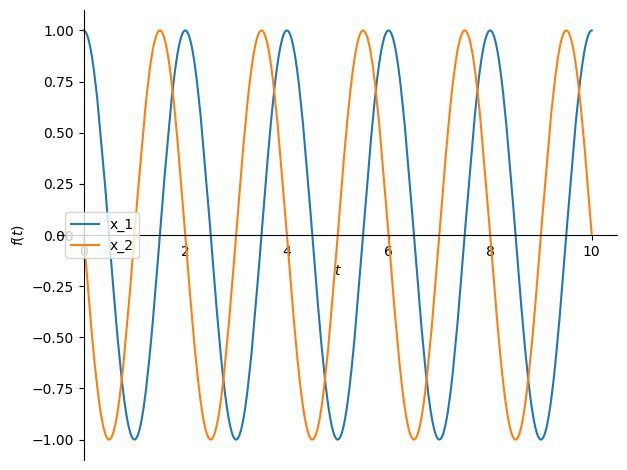

In [14]:

t = sym.symbols('t')
T_d = 1.5
p1 = plot(sym.cos(sym.pi*t), (t, 0,10), label='x_1', show=False, legend=True)
p2 = plot(sym.cos(sym.pi*(t-T_d)), (t, 0,10), label='x_2', show=False)
p1.append(p2[0])
p1.show()

---

---

#### Exemplo 2

Para o caso discreto, é mostrado abaixo. O sinal $x_2[n] = \cos\left(\pi \frac{n-3}{N}\right)$ é o sinal $x_1[n] = \cos\left(\pi\frac{n}{N}\right)$ atrasado de 3 instantes.

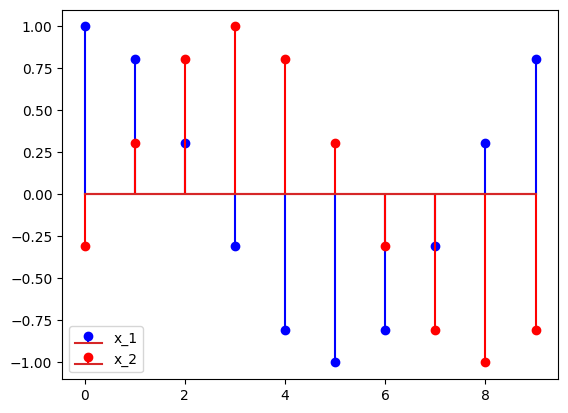

In [15]:
n = np.arange(0, 10)
N = 5
Nd = 3
x1 = np.cos(np.pi*n/N)
x2 = np.cos(np.pi*(n-Nd)/N)
plt.stem(n, x1, linefmt='blue', label='x_1')
plt.stem(n, x2, linefmt='red', label='x_2')
plt.legend()

---

### Reflexão no tempo

A reflexão no tempo é a transformação em que um sinal aparece espelhado em relação à ordenada do gráfico.  No gráfico abaixo, o sinal $x_2(t) = x_1(-t)$. É isso que define a reflexão no tempo. Essa transformação irá aparecer numa operação muito importante entre sinais conhecida como convolução.  

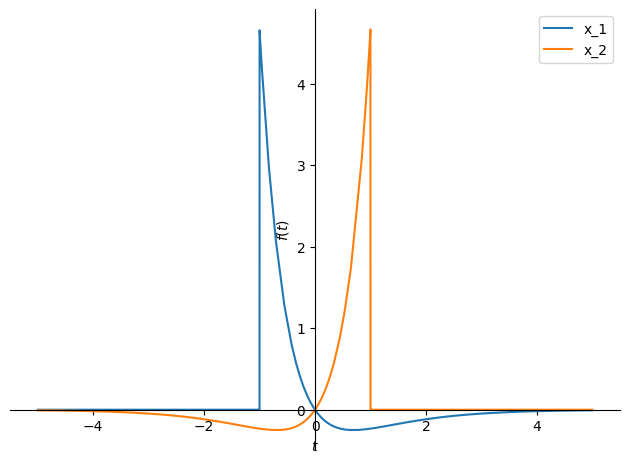

In [16]:
p1 = plot((sym.exp(-2*t) - sym.exp(-t))*sym.Heaviside(t+1), (t,-5,5), show=False, label='x_1', legend=True)
p2 = plot((sym.exp(2*t) - sym.exp(t))*sym.Heaviside(-t+1), (t,-5,5), show=False, label='x_2')
p1.append(p2[0])
p1.show()

---

#### Exemplo 4

Abaixo um exemplo de reflexão no tempo para o caso discreto. Note que $x_1[n] = x_2[-n]$.

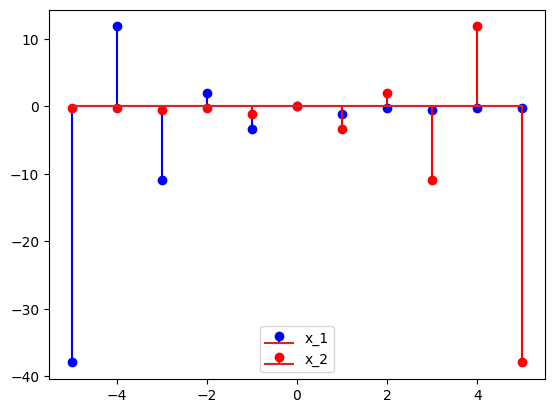

In [17]:
n = np.arange(-5,6)
x1 = (-0.5)**n - (0.7)**n
x2 = (-0.5)**(-n) - (0.7)**(-n)
plt.stem(n, x1, linefmt='blue', label='x_1')
plt.stem(n, x2, linefmt='red', label='x_2')
plt.legend()

---

### Mudança de escala

Outra transformação importante é a mudança de escala de um sinal. Ao multiplicar o tempo por uma constante o sinal corre mais rápido (se a constante for maior do que 1) ou mais devagar (se a constante for menor do que 1). Abaixo temos 3 sinais de tempo contínuo. O sinal $x_2(t) = x_1(2t)$. Ele aparece comprimido no tempo. É como se o tempo tivesse passado mais rápido para o sinal $x_2(t)$ O sinal $x_3(t) = x_1\left(\frac{t}{2}\right)$. Ele aparece expandido no tempo, como se o tempo passasse mais lentamente para o sinal $x_3(t)$. Esse tipo de transformação é muito usado em aplicativos de mensagem, que possibilitam ouvir uma mensagem de áudio mais rapidamente.



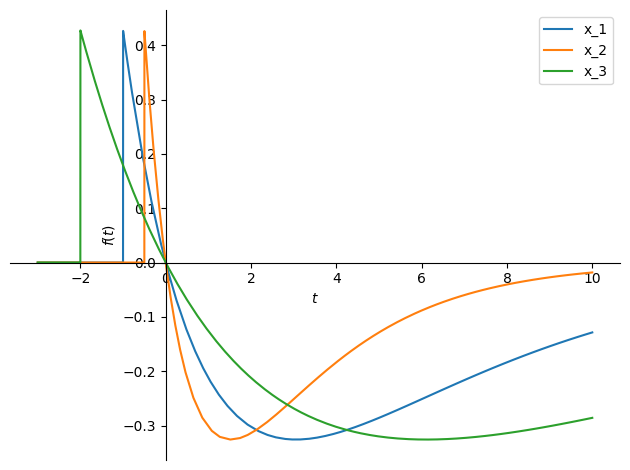

In [6]:
p1 = plot((sym.exp(-0.5*t) - sym.exp(-0.2*t))*sym.Heaviside(t+1), (t,-3,10), show=False, label='x_1', legend=True)
p2 = plot((sym.exp(-2*0.5*t) - sym.exp(-2*0.2*t))*sym.Heaviside(2*t+1), (t,-3,10), show=False, label='x_2')
p3 = plot((sym.exp(-0.5*0.5*t) - sym.exp(-0.5*0.2*t))*sym.Heaviside(0.5*t+1), (t,-3,10), show=False, label='x_3')
p1.append(p2[0])
p1.append(p3[0])
p1.show()

Abaixo estão exemplos de sinais de tempo discreto em diferentes escalas. Os três sinais têm o mesmo formato, embora devido à natureza discreta dos sinais, eles não tenham exatamente os mesmos valores.

O sinal $x_2[n] = x_1[2n]$ é comprimido em relação ao $x_1[n]$. No caso de tempo discreto, essa mudança de escala com a escala maior do que 1 é chamada de subamostragem. Esse nome é usado porque o sinal perde alguns valores em relação ao sinal original. Note no gráfico que o sinal $x_2[n]$ não tem alguns valores que estão presentes no sinal $x_1[n]$.

O sinal $x_3[n] = x_1[0.5n]$ é expandido em relação ao $x_1[n]$. No caso de tempo discreto, essa mudança de escala com a escala menor do que 1 é chamada de superamostragem. Esse nome é usado porque o sinal $x_3[n]$ tem valores que não estão presentes no sinal $x_1[n]$. No gráfico abaixo é possível observar esse fenômeno.

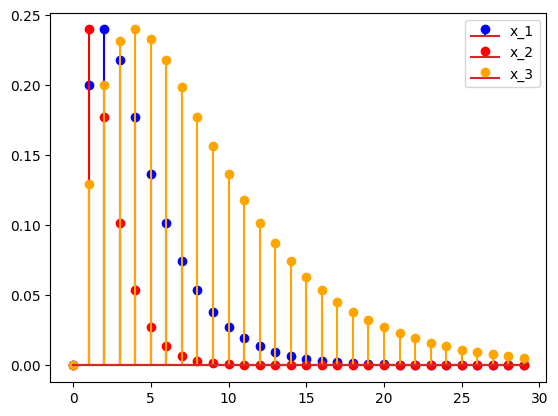

In [7]:
n = np.arange(0,30)
x1 = (0.7)**n - (0.5)**n
x2 = (0.7)**(2*n) - (0.5)**(2*n)
x3 = (0.7)**(0.5*n) - (0.5)**(0.5*n)
plt.stem(n, x1, linefmt='blue', label='x_1')
plt.stem(n, x2, linefmt='red', label='x_2')
plt.stem(n, x3, linefmt='orange', label='x_3')
plt.legend()

## Simetria par e ímpar

Uma propriedade útil para a análise de sinais é verificar se existe alguma simetria em relação ao tempo. Então são definidas duas simetrias:

### Simetria par:

Acontece se:

$$x(t) = x(-t) $$

no caso de sinais contínuos, e


$$x[n] = x[-n]$$

no caso de sinais de tempo discreto.

---

#### Exemplo 4

Por exemplo, o sinal cosseno, visto abaixo, tem simetria par. Os instantes negativos têm os mesmos valores dos positivos.

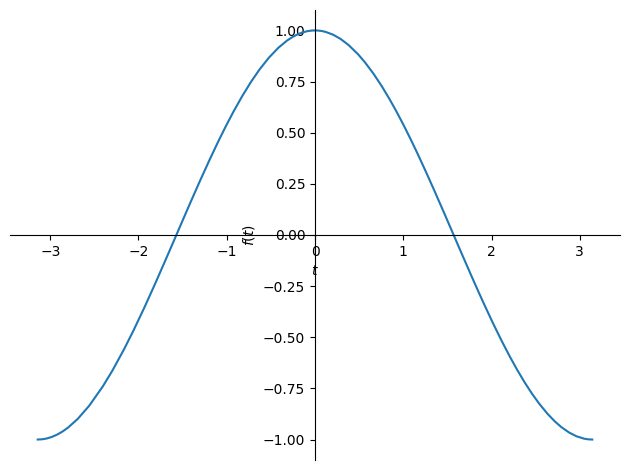

In [8]:
t = sym.symbols('t')
x = sym.cos(t)
sym.plot(x, (t, -sym.pi, sym.pi))

---

### Simetria ímpar

Acontece se:

$$x(t) = -x(-t) $$

no caso de sinais contínuos, e


$$x[n] = -x[-n]$$

no caso de sinais de tempo discreto.

Note que no caso do sinal ter simetria ímpar, $x(0) = 0$ (já que $x(0) = -x(0)$).

---

#### Exempo 5

O sinal seno, visto abaixo, tem simetria ímpar. Os instantes negativos têm os valores dos positivos com sinais trocados.

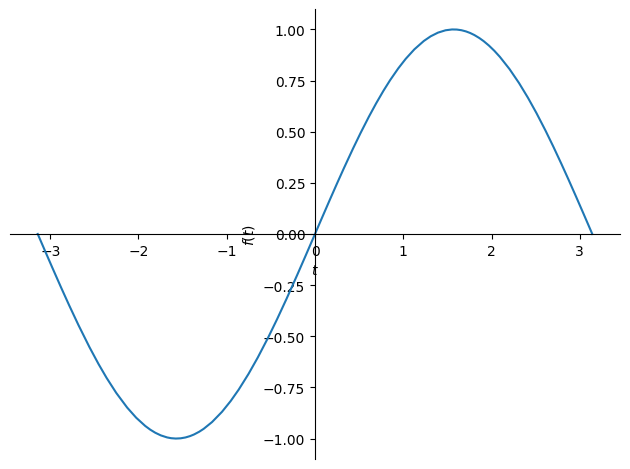

In [9]:
t = sym.symbols('t')
x = sym.sin(t)
sym.plot(x, (t, -sym.pi, sym.pi))

---

### Decomposição em sinais pares e ímpares

Qualquer sinal pode ser decomposto em uma parte par e uma parte ímpar. Abaixo as expressões decomposição para tempo contínuo

$Par\{x(t)\} = \frac{x(t)+x(-t)}{2}$

e

$Impar\{x(t)\} = \frac{x(t)-x(-t)}{2}$

---


#### Exemplo 6


Por exemplo, no gráfico abaixo, são mostradas as partes par e ímpar do sinal $x(t) = e^{-\frac{t}{2}}-e^{-\frac{t}{5}}$. As partes par e ímpar são encontradas usando as expressões acima.

$$Par\{x(t)\} = \frac{e^{-\frac{t}{2}}-e^{-\frac{t}{5}}+e^{\frac{t}{2}}-e^{\frac{t}{5}}}{2}$$

$$Impar\{x(t)\} = \frac{e^{-\frac{t}{2}}-e^{-\frac{t}{5}}-e^{\frac{t}{2}}+e^{\frac{t}{5}}}{2}$$

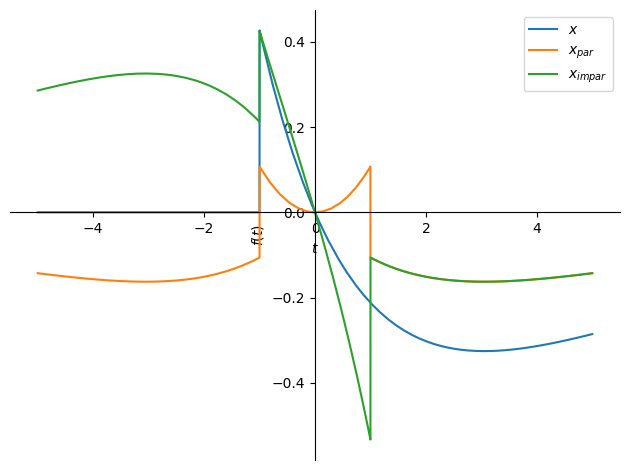

In [10]:
x1 = (sym.exp(-0.5*t) - sym.exp(-0.2*t))*sym.Heaviside(t+1)
p1 = plot(x1, (t,-5,5), show=False, label='$x$', legend=True)
xpar = 0.5*(x1+x1.subs(t, -t))
ximpar = 0.5*x1-x1.subs(t, -t)
p2 = plot(xpar, (t,-5,5), show=False, label='$x_{par}$', legend=True)
p3 = plot(ximpar, (t,-5,5), show=False, label='$x_{impar}$', legend=True)
p1.append(p2[0])
p1.append(p3[0])
p1.show()

---

## Sinais periódicos

Um sinal é periódico se existe uma constante $T$ para a qual:

$x(t) = x(t+kT)$

para todo $t$ e para todo $k$ inteiro.

O menor valor de $T$ para o qual a relação acima é verdadeira (note que se se a relação for válida para $T$, será válida para $2T$, $3T$,...) é conhecido como período fundamental $T_0$ (muitas vezes referido simplesmente como período) do sinal $x(t)$.

O grupo de sinais periódicos mais comum e importante (toda a teoria subsequente é baseada nele) é o das senoides:

$$x(t) = \mathrm{sen}(2\pi ft + \theta_0)$$

---

#### Exemplo 7

Abaixo uma senoide com $f= 3$ e $\theta_0=\frac{\pi}{3}$

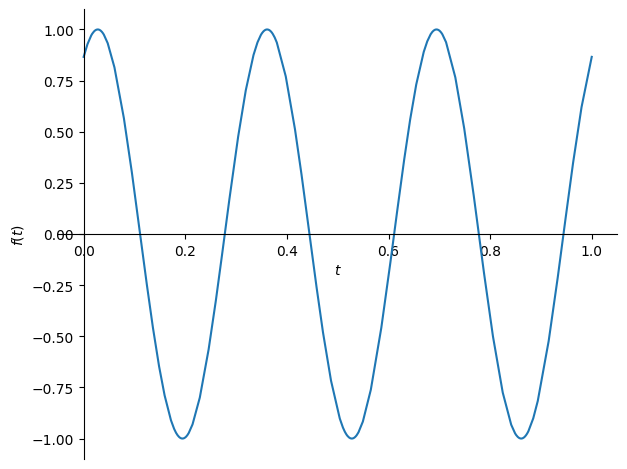

In [11]:
t = sym.symbols('t')
f = 3
x = sym.sin(2*sym.pi*f*t+sym.pi/3)
sym.plot(x, (t,0, 1))

---

Em uma senoide, o valor de $f$ é a sua frequência, em Hz. O número que multiplica o tempo é $2\pi f$, chamado de frequência angular, muitas vezes representado por $\omega_0$. Dependendo da área é mais comum especificar a frequência $f$ ou a frequência angular $\omega_0$. O valor $\theta_0$ é a fase da senoide, em radianos. Ele especifica o valor de atraso do sinal. Em $t=0$, o valor da senoide será $x(0)=\mathrm{sen}(\theta_0)$.

Vale lembrar que o sinal cosseno é uma senoide deslocada de $\pi/2$ radianos ($\theta_0=\frac{\pi}{2}$)

$\cos(t) = \mathrm{sen}\left(t+\frac{\pi}{2}\right)$

Para os sinais de tempo discreto, o conceito é similar. Um sinal de tempo discreto é periódico se existe uma constante inteira $N$ para a qual:

$x[n] = x[n+kN]$

para todo $n$ e $k$ inteiros.

---

#### Exemplo 8

Abaixo está o gráfico do sinal

$x[n] = \mathrm{sen}\left(\frac{\pi}{5}n + \frac{\pi}{4}\right)$

<StemContainer object of 3 artists>

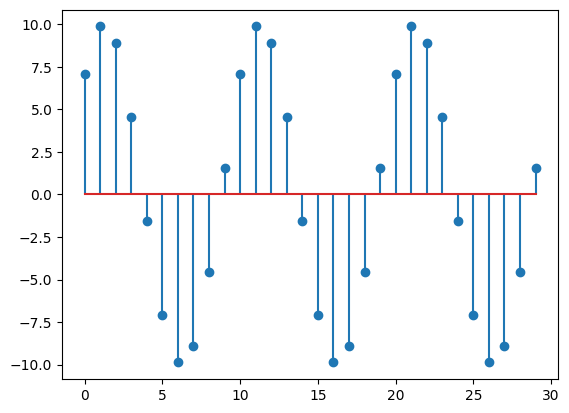

In [12]:
n = np.arange(0, 30)
Omega = np.pi/5
theta = np.pi/4
x = 10*np.sin(Omega*n+theta)
plt.stem(n, x)

O sinal acima tem período fundamental $N_0 = 10$.

---

## Exercícios

**1)** Suponha que $x[n]$ seja um sinal com $x[n]=0$ para $n<-3$ e $n>2$. Para cada um dos sinais a seguir, determinar os valores de $n$ para os quais os sinais são zero.

a) $y_1[n] = x[n-3]$

b) $y_2[n] = x[n+4]$

c) $y_3[n] = x[-n]$

d) $y_4[n] = x[-n+2]$

e) $y_5[n] = x[-n-2]$

**2)** Suponha que $x(t)$ seja um sinal com $x(t)=0$ para $t>5$.Para os sinais abaixo, determine para quais valores de $t$, os sinais são iguais a zero:

a) $y_1(t) = x(1-t)$

b) $y_2(t) = x(-t)$

c) $y_3(t) = x\left(\frac{t}{2}\right)$

d) $y_4(t) = x(6t)$



**3)** O sinal de tempo contínuo $x(t)$ é mostrado abaixo. Esboce, colocando as escalas, cada um dos sinais abaixo:

a) $y_1(t) = x(t-3)$

b) $y_2(t) = x(1-t)$

c) $y_3(t) = x(2-\frac{t}{3})$


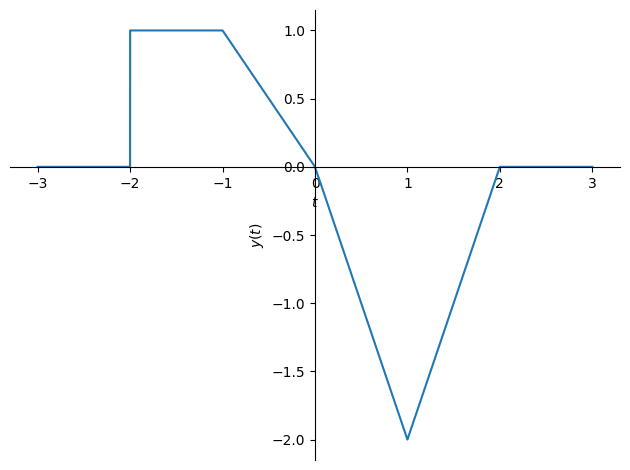

In [18]:
t = sym.symbols('t')
y = sym.Piecewise((1, (t >= -2) & (t < -1)),
                  (-t, (t >= -1) & (t < 0)),
                  (-2*t, (t >= 0) & (t < 1)),
                  (2*t-4, (t >= 1) & (t < 2)),
                  (0, True))
sym.plot(y, (t, -3,3), ylabel='$y(t)$')

**4)** O sinal de tempo discreto $x[n]$ é mostrado abaixo. Para os valores de $n$ não mostrados no gráfico, o valor de $x[n]=0$. Esboce os seguintes sinais:

a) $y_1[n] = x[n-4]$

b) $y_2[n] = x[2-k]$

c) $y_3[n] = x[3n]$

d) $y_4[n] = x[3n+1]$

e) $y_5[n] = x[(n-1)^2]$

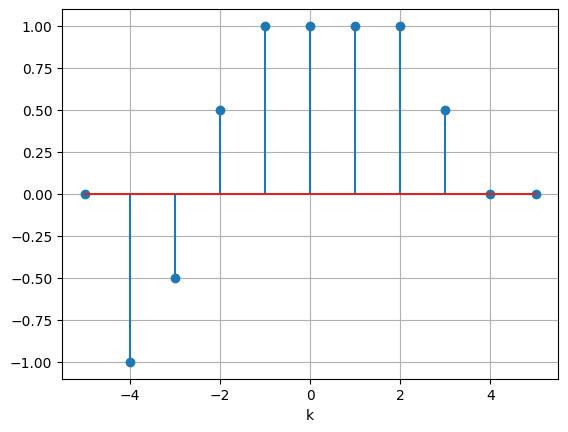

In [19]:
k = np.arange(-5, 6)
x = [0,-1, -0.5, 0.5, 1, 1, 1, 1, 0.5, 0,0]
plt.stem(k,x)
plt.xlabel('k')
plt.grid()

**5)** Para cada dos sinais abaixo, verifique se o sinal é par, ímpar, ou não apresenta nenhuma simetria.

a) $x_1(t) = \mathrm{sen}(2t)\cos(2t)$

b) $x_2(t) = \mathrm{sen}(t^2)$

**6)** Decomponha e rascunhe os seguintes sinais nas suas partes par e ímpar:

a) $x_1(t) = \mathrm{sen}(\omega_0t)$

b) $x_2(t) = \cos(\omega_0t)$

c) $x_3(t) = \cos(\omega_0t+\theta)$

d) $x_4[n] = \left(\frac{1}{2}\right)^n$

e) $x_5[n] = \left(\frac{1}{2}\right)^n\cos(n/10)$





**7)** Considere o gráfico abaixo do sinal $y(t) = \left(\frac{3}{4}\right)x(-2t + 0.5)$. Pede-se:

a) Esboce o sinal $x(t)$.

b) Esboce a sua parte par.

c) Esboce a sua parte ímpar.


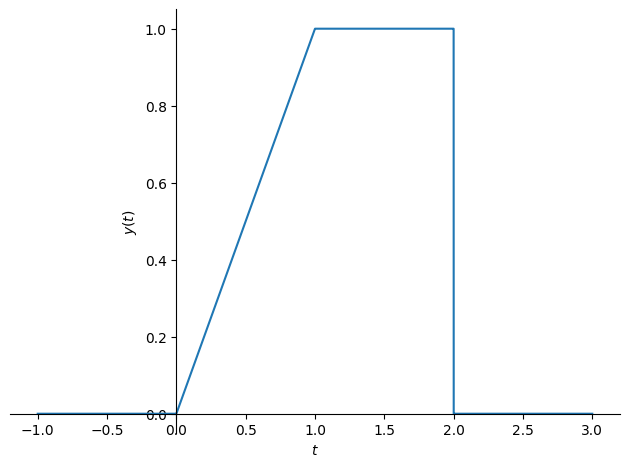

In [20]:
t = sym.symbols('t')
y = sym.Piecewise((t, (t > 0) & (t < 1)), (1, (t >= 1) & (t < 2)), (0, True))
sym.plot(y, (t, -1,3), ylabel='$y(t)$')

**8)** Determine o período fundamental do sinal

$x(t) = \mathrm{sen}(2t)$

## Referências

- Oppenheim, M. Sistemas e Sinais, 2010
- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Lathi, BP, Sinais e Sistemas Lineares, 2007

## Respostas dos exercícios

**1)** Resolvido por Jorge Vinicius Nascimento Lamar

**1)** a)  $y_1[n] = x[n-3]$

Sabendo que $x[n] = 0$ para $n<-3$ e $n>2$

É possivel determinar $y_1[n]=0$ fazendo:

$$n-3 < -3$$
e
$$n-3 > 2$$

portanto:
$$n-3 < -3$$
$$n-3+3 < -3+3$$
$$n < 0$$

e
$$n-3 > 2$$
$$n-3+3 > 2+3$$
$$n > 5$$

logo,  *$y_1[n]=0$* para *$n<0$* e *$n>5$*

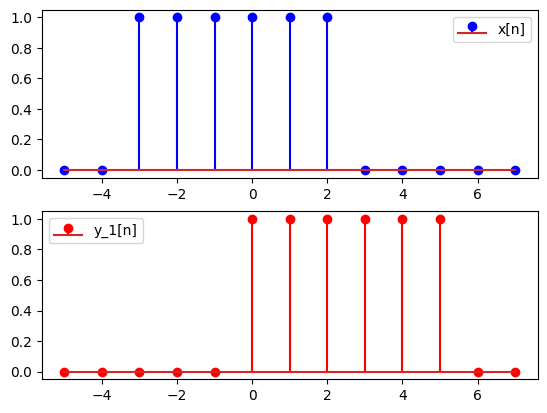

In [21]:
n = np.arange(-5,8)

xn= [0, 0, 1, 1, 1,  1,  1,  1,  0,  0,  0,  0, 0]
y1= [0, 0, 0, 0, 0,  1,  1,  1,  1,  1,  1,  0, 0]

plt.subplot(2, 1, 1)
plt.stem(n, xn, linefmt='blue', label='x[n]')
plt.legend()
plt.subplot(2, 1, 2)
plt.stem(n, y1, linefmt='red', label='y_1[n]')
plt.legend()

**1)** b) $y_2[n] = x[n+4]$

Sabendo que $x[n] = 0$ para $n<-3$ e $n>2$

É possivel determinar $y_1[n]=0$ fazendo:

$$n+4 < -3$$
e
$$n+4 > 2$$

portanto:
$$n+4 < -3$$
$$n+4-4 < -3-4$$
$$n < -7$$

e
$$n+4 > 2$$
$$n+4-4 > 2-4$$
$$n > -2$$

logo,  *$y_2[n]=0$* para *$n<-7$* e *$n>-2$*

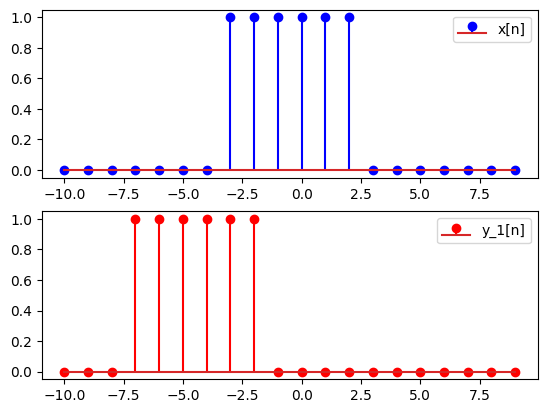

In [22]:
n = np.arange(-10,10)

xn= np.zeros(len(n))
xn[7:13]=1
y1= np.zeros(len(n))
y1[3:9]=1

plt.subplot(2, 1, 1)
plt.stem(n, xn, linefmt='blue', label='x[n]')
plt.legend()
plt.subplot(2, 1, 2)
plt.stem(n, y1, linefmt='red', label='y_1[n]')
plt.legend()

**1)** c) $y_3[n] = x[-n]$

Sabendo que $x[n] = 0$ para $n<-3$ e $n>2$

É possivel determinar $y_1[n]=0$ fazendo:

$$-n < -3$$
e
$$-n > 2$$

portanto:
$$-n < -3$$
$$n > 3$$

e
$$-n > 2$$
$$n < -2$$


logo,  *$y_2[n]=0$* para *$n<-2$* e *$n>3$*

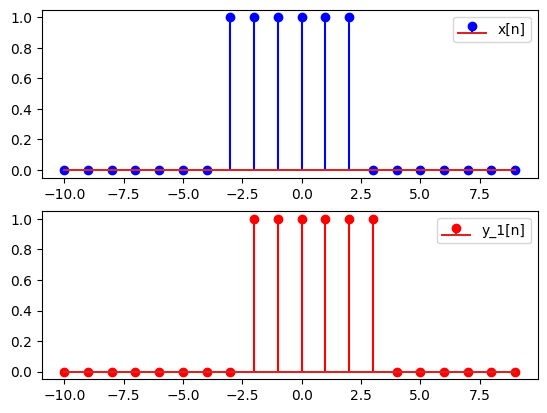

In [23]:
n = np.arange(-10,10)

xn= np.zeros(len(n))
xn[7:13]=1
y1= np.zeros(len(n))
y1[8:14]=1

plt.subplot(2, 1, 1)
plt.stem(n, xn, linefmt='blue', label='x[n]')
plt.legend()
plt.subplot(2, 1, 2)
plt.stem(n, y1, linefmt='red', label='y_1[n]')
plt.legend()

**1)** d) $y_4[n] = x[-n+2]$

Sabendo que $x[n] = 0$ para $n<-3$ e $n>2$

É possivel determinar $y_1[n]=0$ fazendo:

$$-n+2 < -3$$
e
$$-n+2 > 2$$

portanto:
$$-n+2 < -3$$
$$-n+2-2 < -3-2$$
$$-n < -5$$
$$n > 5$$
e
$$-n+2 > 2$$
$$-n+2-2 > 2-2$$
$$-n > 0$$
$$n < 0$$

logo,  *$y_2[n]=0$* para *$n<0$* e *$n>5$*

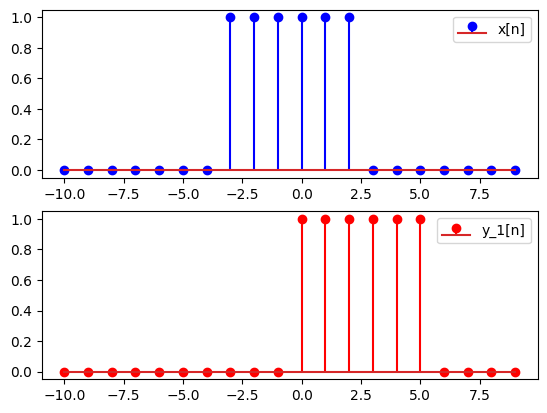

In [24]:
n = np.arange(-10,10)

xn= np.zeros(len(n))
xn[7:13]=1
y1= np.zeros(len(n))
y1[10:16]=1

plt.subplot(2, 1, 1)
plt.stem(n, xn, linefmt='blue', label='x[n]')
plt.legend()
plt.subplot(2, 1, 2)
plt.stem(n, y1, linefmt='red', label='y_1[n]')
plt.legend()

**1)** e) $y_5[n] = x[-n-2]$
Sabendo que $x[n] = 0$ para $n<-3$ e $n>2$

É possivel determinar $y_1[n]=0$ fazendo:

$$-n-2 < -3$$
e
$$-n-2 > 2$$

portanto:
$$-n-2 < -3$$
$$-n-2+2 < -3+2$$
$$-n < -1$$
$$n > 1$$
e
$$-n-2 > 2$$
$$-n-2+2 > 2+2$$
$$-n > 4$$
$$n < -4$$

logo,  *$y_2[n]=0$* para *$n<-4$* e *$n>1$*

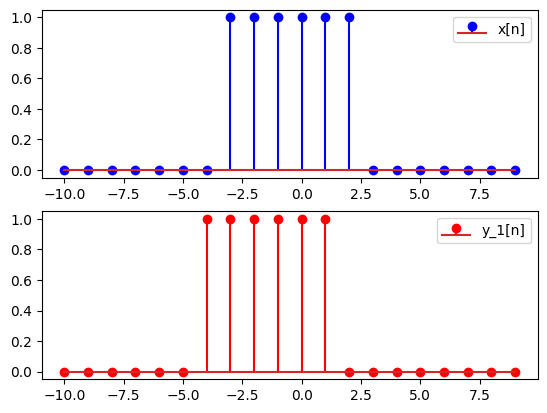

In [25]:
n = np.arange(-10,10)

xn= np.zeros(len(n))
xn[7:13]=1
y1= np.zeros(len(n))
y1[6:12]=1

plt.subplot(2, 1, 1)
plt.stem(n, xn, linefmt='blue', label='x[n]')
plt.legend()
plt.subplot(2, 1, 2)
plt.stem(n, y1, linefmt='red', label='y_1[n]')
plt.legend()

**2)** Resolvido por Frederico Ercolin Guazzelli
**2)** a) $y_1(t) = x(1-t)$

Substituindo $x(t)$ em $y_1(t)$


$y_1(t) = x(1-t) = 0$ para t > 5

Neste caso, $y_1(t)$ será igual a zero quando $1 - t > 5$.

Resolvendo para t:
$$1 - t > 5$$
$$ -t > 5-1$$
$$-t > 4$$
portanto,
$$t < -4$$

logo,  *$y_1(t)$* será igual a zero quando *$t < -4$*.

**2)** b) $y_2(t) = x(-t)$

Substituindo $x(t)$ em $y_2(t)$


$y_2(t) = x(-t) = 0$ para t > 5

Neste caso, $y_2(t)$ será igual a zero quando $ - t > 5$.

Resolvendo para t:
$$ - t > 5$$
$$ t < -5$$

portanto,
$$t < -5$$

logo,  *$y_2(t)$* será igual a zero quando *$t < -5$*.


**2)** c) $y_3(t) = x\left(\frac{t}{2}\right)$

Substituindo $x(t)$ em $y_3(t)$


$y_3(t) = x\left(\frac{t}{2}\right) = 0$ para t > 5

Neste caso, $y_3(t)$ será igual a zero quando $ \frac{t}{2} > 5$.

Resolvendo para t:
$$ \frac{t}{2} > 5$$
$$ t > 5*2$$

portanto,
$$t < 10$$

logo,  *$y_3(t)$* será igual a zero quando *$t > 10$*.

**2)** d) $y_4(t) = x(6t)$

Substituindo $x(t)$ em $y_4(t)$


$y_4(t) = x(6t) = 0$ para t > 5

Neste caso, $y_4(t)$ será igual a zero quando $ 6t > 5$.

Resolvendo para t:
$$ 6t > 5$$

portanto,
$$t > \frac{5}{6}$$

logo,  *$y_4(t)$* será igual a zero quando *$t > \frac{5}{6} $*.

**3)** Resolvido por Catherine Gallis

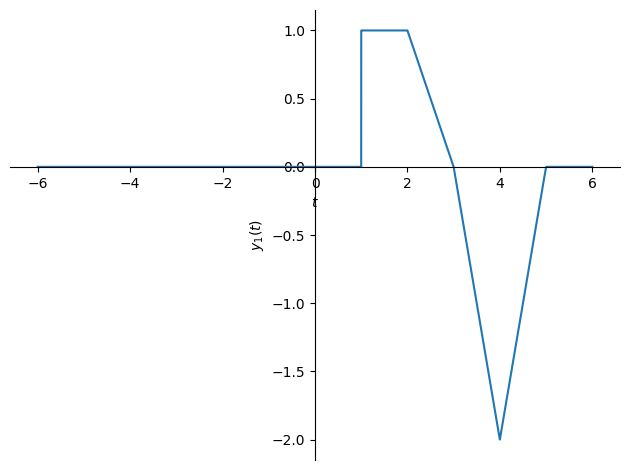

In [31]:
t = sym.symbols('t')

y1 = x.subs(t, t - 3)
y2 = x.subs(t, 1 - t)
y3 = x.subs(t, 2 - t/3)

# função y_1 = x(t-3)
p1 = sym.plot(y1, (t, -6, 6), ylabel='$y_1(t)$', show=False)
p1.show()


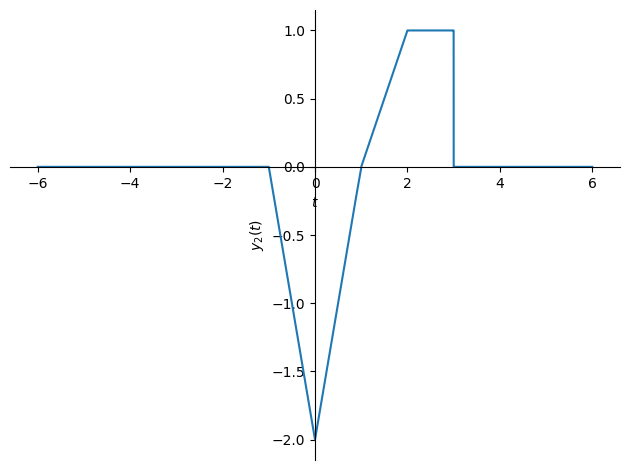

In [29]:
# sinal y_2 = x(1-t)
p2 = sym.plot(y2, (t, -6, 6), ylabel='$y_2(t)$', show=False)
p2.show()

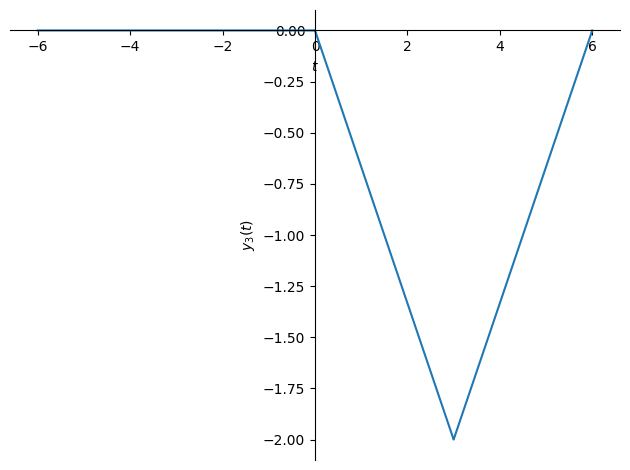

In [30]:
# sinal y_3 = x(2-t/3)
p3 = sym.plot(y3, (t, -6, 6), ylabel='$y_3(t)$', show=False)
p3.show()

**5)** Resolvido por Juliana Soares da Silva de Oliveira

a)
$x_1(-t) = \mathrm{sen}(2(-t))\cos(2(-t)) = -\mathrm{sen}(2t)\cos(2t) = -x_1(t) ≠ x_1(t)$

Como $x_1(-t) = -x_1(t)$, podemos concluir que o sinal $x_1(t)$ é ímpar.

b)
$x_2(-t) = \mathrm{sen}((-t)^2) = \mathrm{sen}(t^2) = x_2(t)$

Como $x_2(-t) = x_2(t)$, podemos concluir que o sinal $x_2(t)$ é par.

**6)** Resolvido por Frederico Ercolin Guazzelli

Parte par definida como:

$ x_p(t) = \frac{1}{2}[x(t)+x(-t)] $ e $ x_p[n] = \frac{1}{2}(x[t]+x[-t]) $

Parte ímpar definida como:

$ x_i(t) = \frac{1}{2}[x(t)-x(-t)] $ e $ x_i[n] = \frac{1}{2}(x[t]-x[-t]) $

 a) $x_1(t) = \mathrm{sen}(\omega_0t)$

Parte par:
$$ x_{1p}(t) = \frac{1}{2}[\mathrm{sen}(\omega_0t) + \mathrm{sen}(-\omega_0t)] = \frac{1}{2}[\mathrm{sen}(\omega_0t) - \mathrm{sen}(\omega_0t)] = 0$$

Parte ímpar:
$$ x_{1i}(t) = \frac{1}{2}[\mathrm{sen}(\omega_0t) - \mathrm{sen}(-\omega_0t)] = \frac{1}{2}[\mathrm{sen}(\omega_0t) + \mathrm{sen}(\omega_0t)] = \mathrm{sen}(\omega_0t) $$

b) $x_2(t) = \cos(\omega_0t)$

Parte par:
$$ x_{2p}(t) = \frac{1}{2}[\cos(\omega_0t) + \cos(-\omega_0t)] = \frac{1}{2}[\cos(\omega_0t) + \cos(\omega_0t)] = \cos(\omega_0t)$$

Parte ímpar:
$$ x_{2i}(t) = \frac{1}{2}[\cos(\omega_0t) - \cos(-\omega_0t)] = \frac{1}{2}[\cos(\omega_0t) - \cos(\omega_0t)] = 0 $$

c) $x_3(t) = \cos(\omega_0t+\theta)$

Parte par:
$$ x_{3p}(t) = \frac{1}{2}[\cos(\omega_0t+\theta) + \cos(-\omega_0t-\theta)] = \frac{1}{2}[\cos(\omega_0t+\theta) + \cos(\omega_0t+\theta)] = \cos(\omega_0t+\theta)$$

Parte ímpar:
$$ x_{3i}(t) \frac{1}{2}[\cos(\omega_0t+\theta) - \cos(-\omega_0t-\theta)] = \frac{1}{2}[\cos(\omega_0t+\theta) - \cos(\omega_0t+\theta)] = 0 $$

d) $x_4[n] = \left(\frac{1}{2}\right)^n$

Parte par:
$$ x_{4p}[n] = \frac{1}{2}[\left(\frac{1}{2}\right)^n + \left(\frac{1}{2}\right)^{-n}] = \frac{1}{2}(2^{n-n})= \frac{1}{2}$$

Parte ímpar:
$$ x_{4i}[n] = \frac{1}{2}[\left(\frac{1}{2}\right)^n - \left(\frac{1}{2}\right)^{-n}] = \frac{1}{2}(2^{n-n}-2^{-n+n})= \frac{1}{2}(1 - 2^{-2n})$$

e) $x_5[n] = \left(\frac{1}{2}\right)^n\cos(n/10)$

Parte par:
$$ x_{5p}[n] = \frac{1}{2}[\left(\frac{1}{2}\right)^n\cos(n/10) + \left(\frac{1}{2}\right)^{-n}\cos(-n/10)] = \frac{1}{2}(2^{n-n}\cos(n/10)+ 2^{-n+n}\cos(-n/10))= \frac{1}{2}(\cos(n/10)+\cos(n/10)) = \cos(n/10)$$

Parte ímpar:
$$ x_{5i}[n] = \frac{1}{2}[\left(\frac{1}{2}\right)^n\cos(n/10) - \left(\frac{1}{2}\right)^{-n}\cos(-n/10)] = \frac{1}{2}(2^{n-n}\cos(n/10)- 2^{-n+n}\cos(-n/10))= \frac{1}{2}(\cos(n/10)-\cos(n/10)) = 0$$

**7)** Resolvido por Catherine

a)

$$y(t) = \left(\frac{3}{4}\right)x(-2t + 0.5)$$

Pode-se isolar x(-2t + 0.5):

$$x(-2t + 0.5) = \frac{4}{3}y(t)$$

$$x(t) = \frac{4}{3}y\left(\frac{0.5 - t}{2}\right)$$



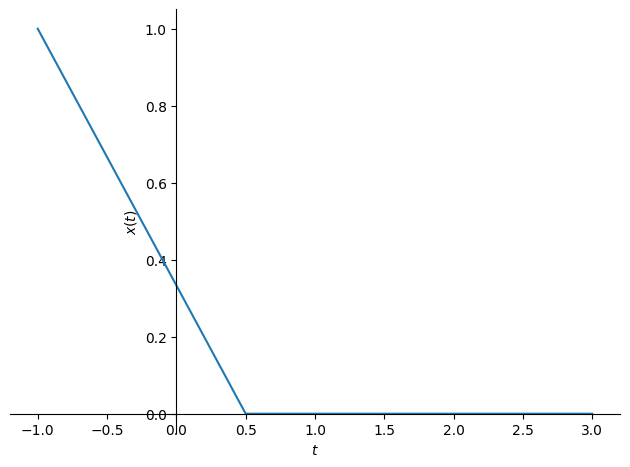

In [32]:
x_t = (4/3) * y.subs(t, (0.5 - t) / 2)
sym.plot(x_t, (t, -1, 3), ylabel='$x(t)$')

b)

$$x_p(t) = \frac{x(t) + x(-t)}{2}$$


$$x_p(t) = \frac{\frac{4}{3}y\left(\frac{0.5 - t}{2}\right) + \frac{4}{3}y\left(\frac{0.5 + t}{2}\right)}{2}$$



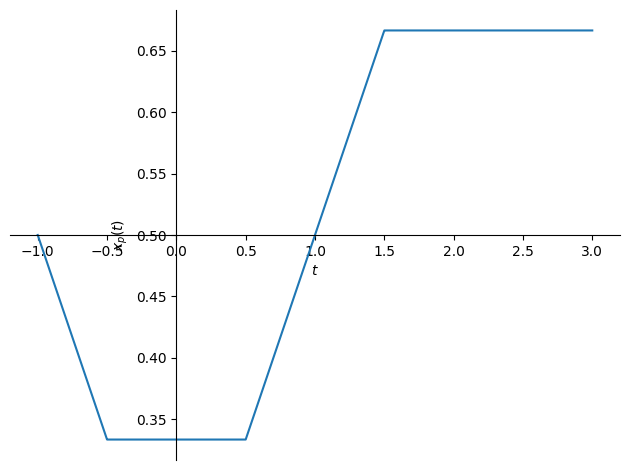

In [33]:
x_p_t = (x_t + x_t.subs(t, -t)) / 2
sym.plot(x_p_t, (t, -1, 3), ylabel='$x_p(t)$')

c)

Para obter a parte ímpar de x(t), pode-se usar a relação:

$$x_i(t) = \frac{x(t) - x(-t)}{2}$$

Substituindo a expressão para x(t):

$$x_i(t) = \frac{\frac{4}{3}y\left(\frac{0.5 - t}{2}\right) - \frac{4}{3}y\left(\frac{0.5 + t}{2}\right)}{2}$$

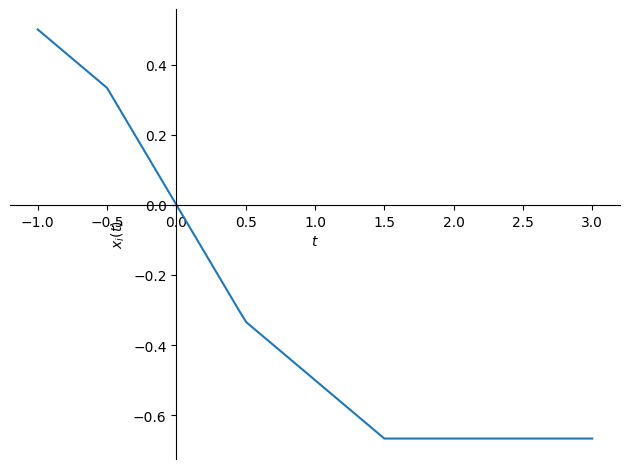

In [34]:
x_i_t = (x_t - x_t.subs(t, -t)) / 2
sym.plot(x_i_t, (t, -1, 3), ylabel='$x_i(t)$')

**8)** Resolvido por Juliana Soares da Silva de Oliveira


$\mathrm{sen}(at) = \frac{2π}{a}$

$\mathrm{sen}(2t) = \frac{2π}{2} = π$

Portanto, o período fundamental do sinal $x(t) = sen(2t)$ é $π$. Isso significa que a função se repete a cada $π$ unidades de tempo.